In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk

In [2]:
# Configure libraries
# The seaborn library makes plots look nicer
sns.set()
sns.set_context('talk')

# Don't display too many rows/cols of DataFrames
pd.options.display.max_rows = 7
pd.options.display.max_columns = 8

# Round decimals when displaying DataFrames
pd.set_option('precision', 2)

In [3]:
df = pd.read_csv('UpdatedCV.csv')
df

,Program,Year,Period,State,Commodity,Data Item,Value
0,SURVEY,2020,JAN,CALIFORNIA,GRAPEFRUIT,"GRAPEFRUIT, UTILIZED - PRODUCTION, MEASURED IN...","4,100,000"
1,SURVEY,2020,JAN,CALIFORNIA,GRAPEFRUIT,"GRAPEFRUIT, UTILIZED - PRODUCTION, MEASURED IN...","164,000"
2,SURVEY,2020,JAN,CALIFORNIA,LEMONS,"LEMONS, UTILIZED - PRODUCTION, MEASURED IN BOXES","19,000,000"
...,...,...,...,...,...,...,...
373,SURVEY,2020,APR,CALIFORNIA,CHICKENS,"CHICKENS, LAYERS - MOLT COMPLETED, MEASURED IN...",7.5
374,SURVEY,2020,APR,CALIFORNIA,POTATOES,"POTATOES - STOCKS, MEASURED IN CWT","600,000"
375,SURVEY,2020,APR,CALIFORNIA,POTATOES,"POTATOES - STOCKS, MEASURED IN PCT OF PRODUCTION",3


In [4]:
df = df[df['Value'] != ' (D)']
df = df[df['Value'] != ' (S)']
df = df[df['Value'] != ' (NA)']
df

,Program,Year,Period,State,Commodity,Data Item,Value
0,SURVEY,2020,JAN,CALIFORNIA,GRAPEFRUIT,"GRAPEFRUIT, UTILIZED - PRODUCTION, MEASURED IN...","4,100,000"
1,SURVEY,2020,JAN,CALIFORNIA,GRAPEFRUIT,"GRAPEFRUIT, UTILIZED - PRODUCTION, MEASURED IN...","164,000"
2,SURVEY,2020,JAN,CALIFORNIA,LEMONS,"LEMONS, UTILIZED - PRODUCTION, MEASURED IN BOXES","19,000,000"
...,...,...,...,...,...,...,...
373,SURVEY,2020,APR,CALIFORNIA,CHICKENS,"CHICKENS, LAYERS - MOLT COMPLETED, MEASURED IN...",7.5
374,SURVEY,2020,APR,CALIFORNIA,POTATOES,"POTATOES - STOCKS, MEASURED IN CWT","600,000"
375,SURVEY,2020,APR,CALIFORNIA,POTATOES,"POTATOES - STOCKS, MEASURED IN PCT OF PRODUCTION",3


In [5]:
df = df[['Year','Period','Commodity','Value']].reset_index(drop=True)
df

,Year,Period,Commodity,Value
0,2020,JAN,GRAPEFRUIT,"4,100,000"
1,2020,JAN,GRAPEFRUIT,"164,000"
2,2020,JAN,LEMONS,"19,000,000"
...,...,...,...,...
282,2020,APR,CHICKENS,7.5
283,2020,APR,POTATOES,"600,000"
284,2020,APR,POTATOES,3


In [6]:
#REMOVE ALL ',' to make data more uniform
df = df.replace(',','', regex=True)
df

,Year,Period,Commodity,Value
0,2020,JAN,GRAPEFRUIT,4100000
1,2020,JAN,GRAPEFRUIT,164000
2,2020,JAN,LEMONS,19000000
...,...,...,...,...
282,2020,APR,CHICKENS,7.5
283,2020,APR,POTATOES,600000
284,2020,APR,POTATOES,3


In [7]:
df = df.reset_index(drop=True)
df

,Year,Period,Commodity,Value
0,2020,JAN,GRAPEFRUIT,4100000
1,2020,JAN,GRAPEFRUIT,164000
2,2020,JAN,LEMONS,19000000
...,...,...,...,...
282,2020,APR,CHICKENS,7.5
283,2020,APR,POTATOES,600000
284,2020,APR,POTATOES,3


In [8]:
dfjan = df[df['Period'] == 'JAN']
dfjan_potatoes = dfjan[dfjan['Commodity']=='POTATOES']
dfjan_potatoes = 101920000

In [9]:
dffeb = df[df['Period'] == 'FEB']
dffeb_potatoes = dffeb[dffeb['Commodity']=='POTATOES']
dffeb_potatoes

,Year,Period,Commodity,Value
164,2020,FEB,POTATOES,1600000
165,2020,FEB,POTATOES,9
166,2020,FEB,POTATOES,35
167,2020,FEB,POTATOES,42
168,2020,FEB,POTATOES,17


In [10]:
dfmar = df[df['Period'] == 'MAR']
dfmar

,Year,Period,Commodity,Value
169,2020,MAR,BARLEY,65000
170,2020,MAR,BEANS,16000
171,2020,MAR,CHICKPEAS,12000
...,...,...,...,...
262,2020,MAR,SHEEP,25100
263,2020,MAR,SHEEP,154
264,2020,MAR,SHEEP,3857000


In [11]:
dfapr = df[df['Period'] == 'APR']
dfapr

,Year,Period,Commodity,Value
265,2020,APR,GRAPEFRUIT,4300000
266,2020,APR,GRAPEFRUIT,172000
267,2020,APR,LEMONS,21000000
...,...,...,...,...
282,2020,APR,CHICKENS,7.5
283,2020,APR,POTATOES,600000
284,2020,APR,POTATOES,3


In [12]:
df = pd.concat([dfjan, dffeb, dfmar, dfapr])
df

,Year,Period,Commodity,Value
0,2020,JAN,GRAPEFRUIT,4100000
1,2020,JAN,GRAPEFRUIT,164000
2,2020,JAN,LEMONS,19000000
...,...,...,...,...
282,2020,APR,CHICKENS,7.5
283,2020,APR,POTATOES,600000
284,2020,APR,POTATOES,3


In [13]:
df.reset_index(drop=True)
df

,Year,Period,Commodity,Value
0,2020,JAN,GRAPEFRUIT,4100000
1,2020,JAN,GRAPEFRUIT,164000
2,2020,JAN,LEMONS,19000000
...,...,...,...,...
282,2020,APR,CHICKENS,7.5
283,2020,APR,POTATOES,600000
284,2020,APR,POTATOES,3


In [14]:
df_potatoes = df[df['Commodity']== 'POTATOES']
df_potatoes

,Year,Period,Commodity,Value
164,2020,FEB,POTATOES,1600000
165,2020,FEB,POTATOES,9
166,2020,FEB,POTATOES,35
167,2020,FEB,POTATOES,42
168,2020,FEB,POTATOES,17
283,2020,APR,POTATOES,600000
284,2020,APR,POTATOES,3


In [15]:
df['Commodity'].unique()

array(['GRAPEFRUIT', 'LEMONS', 'ORANGES', 'TANGERINES', 'CATTLE',
       'CHICKENS', 'FOOD FISH', 'GOATS', 'SHEEP', 'BEANS', 'BUTTER',
       'CHEESE', 'EGGS', 'HAY', 'HOGS', 'ICE CREAM', 'MILK', 'RED MEAT',
       'RICE', 'POTATOES', 'BARLEY', 'CHICKPEAS', 'CORN', 'COTTON',
       'FIELD CROP TOTALS', 'OATS', 'SUGARBEETS', 'SUNFLOWER', 'WHEAT'],
      dtype=object)

In [16]:
df = df[df['Commodity'] != 'WHEAT']
df = df[df['Commodity'] != 'SOIL']
df = df[df['Commodity'] != 'BARLEY']
df = df[df['Commodity'] != 'RICE']
df = df[df['Commodity'] != 'PASTURELAND']
df = df[df['Commodity'] != 'FIELDWORK']
df = df[df['Commodity'] != 'COTTON']
df = df.reset_index(drop=True)
df

,Year,Period,Commodity,Value
0,2020,JAN,GRAPEFRUIT,4100000
1,2020,JAN,GRAPEFRUIT,164000
2,2020,JAN,LEMONS,19000000
...,...,...,...,...
255,2020,APR,CHICKENS,7.5
256,2020,APR,POTATOES,600000
257,2020,APR,POTATOES,3


In [17]:
df_potatoes['Year'].astype('object')

164    2020
165    2020
166    2020
167    2020
168    2020
283    2020
284    2020
Name: Year, dtype: object

In [18]:
df_potatoes["Period"] = df_potatoes["Period"].astype('str') + " " + df_potatoes["Year"].astype('str')
df_potatoes

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Year,Period,Commodity,Value
164,2020,FEB 2020,POTATOES,1600000
165,2020,FEB 2020,POTATOES,9
166,2020,FEB 2020,POTATOES,35
167,2020,FEB 2020,POTATOES,42
168,2020,FEB 2020,POTATOES,17
283,2020,APR 2020,POTATOES,600000
284,2020,APR 2020,POTATOES,3


In [19]:
df_potatoes = df_potatoes.drop('Year', axis=1)
df_potatoes

,Period,Commodity,Value
164,FEB 2020,POTATOES,1600000
165,FEB 2020,POTATOES,9
166,FEB 2020,POTATOES,35
167,FEB 2020,POTATOES,42
168,FEB 2020,POTATOES,17
283,APR 2020,POTATOES,600000
284,APR 2020,POTATOES,3


In [20]:
potatoes_plot = df_potatoes[['Period', 'Value']]

In [21]:
df_potatoes['Period'] = df_potatoes['Period'].astype('str')
df_potatoes['Value'] = df_potatoes['Value'].astype('float')

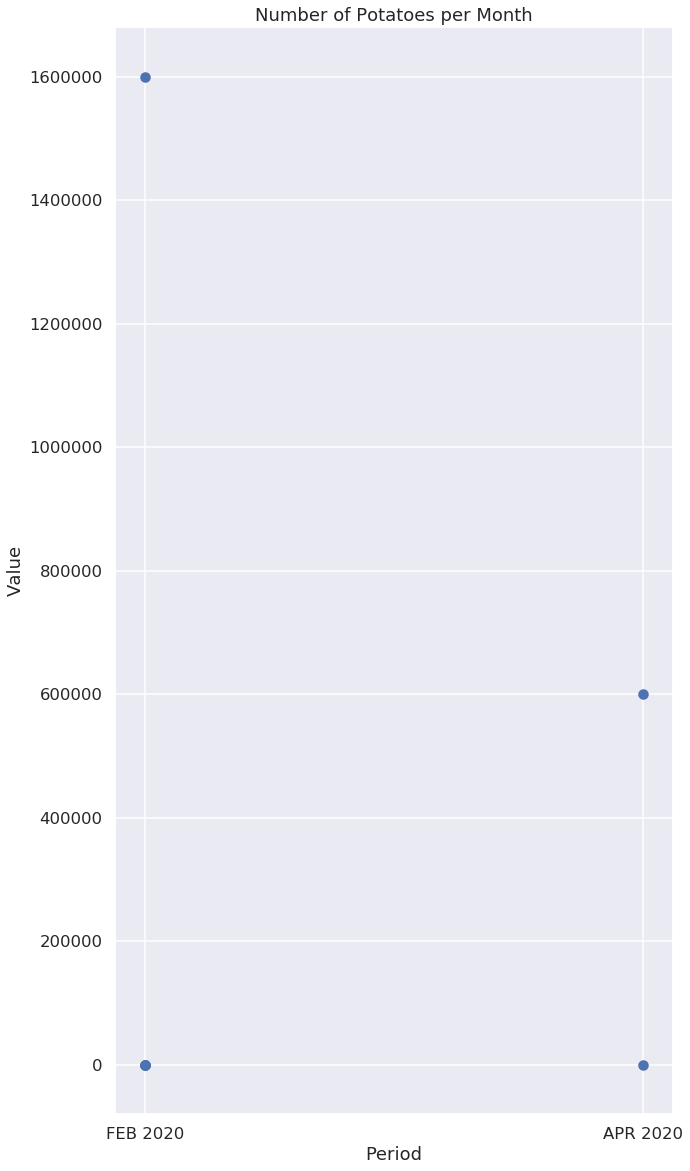

In [22]:
#Scatterplot for oranges
fig = plt.figure(figsize=(10,20))
plt.xlabel("Period")
plt.ylabel("Value")
plt.title("Number of Potatoes per Month")
plt.scatter(df_potatoes['Period'], df_potatoes['Value'])

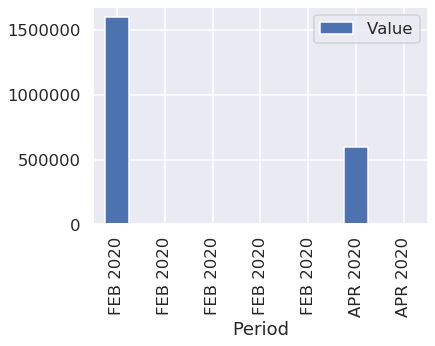

In [23]:
potatoes = df_potatoes.plot.bar(x='Period', y='Value')

In [24]:
df_tangerines = df[df['Commodity']== 'TANGERINES']
df_tangerines

,Year,Period,Commodity,Value
10,2020,JAN,TANGERINES,22000000
11,2020,JAN,TANGERINES,880000
113,2020,FEB,TANGERINES,22000000
...,...,...,...,...
188,2020,MAR,TANGERINES,880000
248,2020,APR,TANGERINES,23000000
249,2020,APR,TANGERINES,920000


In [25]:
df_tangerines["Period"] = df_tangerines["Period"].astype('str') + " " + df_tangerines["Year"].astype('str')
df_tangerines

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Year,Period,Commodity,Value
10,2020,JAN 2020,TANGERINES,22000000
11,2020,JAN 2020,TANGERINES,880000
113,2020,FEB 2020,TANGERINES,22000000
...,...,...,...,...
188,2020,MAR 2020,TANGERINES,880000
248,2020,APR 2020,TANGERINES,23000000
249,2020,APR 2020,TANGERINES,920000


In [26]:
df_tangerines = df_tangerines.drop('Year', axis=1)
df_tangerines

,Period,Commodity,Value
10,JAN 2020,TANGERINES,22000000
11,JAN 2020,TANGERINES,880000
113,FEB 2020,TANGERINES,22000000
...,...,...,...
188,MAR 2020,TANGERINES,880000
248,APR 2020,TANGERINES,23000000
249,APR 2020,TANGERINES,920000


In [27]:
df_tangerines['Value'] = df_tangerines['Value'].astype('float')

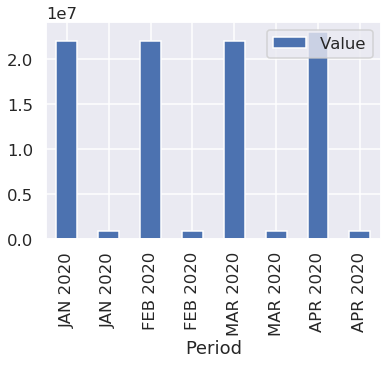

In [28]:
tangerines_graph = df_tangerines.plot.bar(x='Period', y='Value')

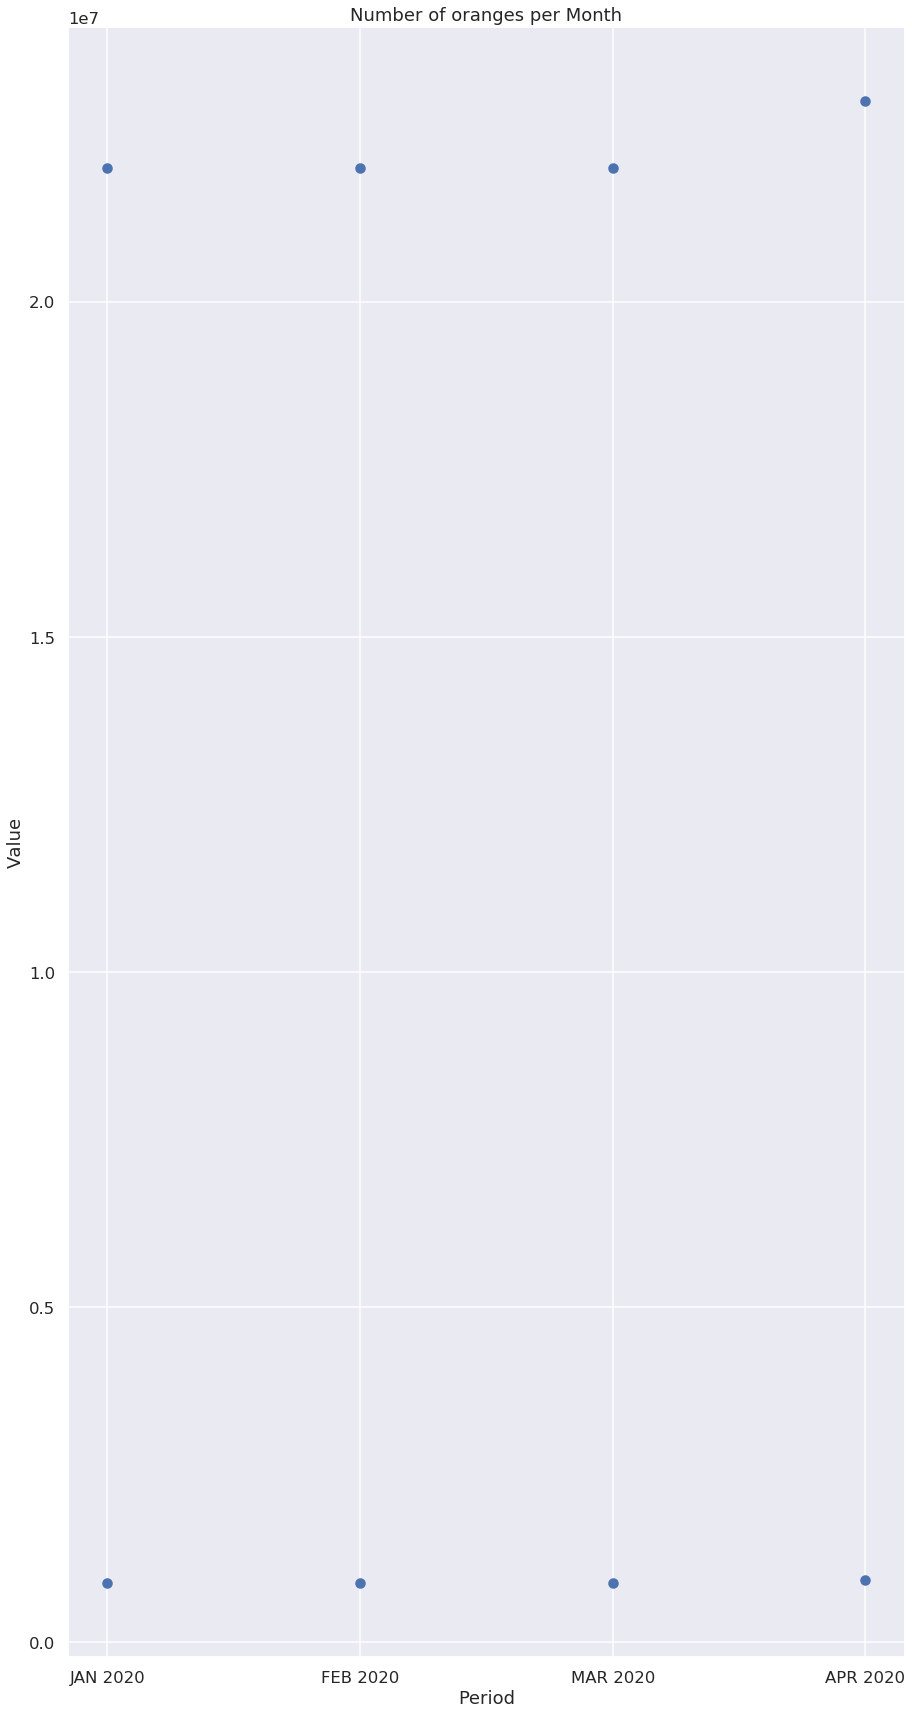

In [29]:
#Scatterplot for Tangerines

fig = plt.figure(figsize=(15,30))
plt.xlabel("Period")
plt.ylabel("Value")
plt.title("Number of oranges per Month")
plt.scatter(df_tangerines['Period'], df_tangerines['Value'])